# Machine Learning Assignment 1

### Task 1 - Prepare a data quality plan for the dataset. 

In [62]:
# importing packages
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector

In [63]:
# loading dataset into pandas dataframe
df = pd.read_csv("pulsar_star_20355246.csv")
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,69.210938,36.152380,2.602622,11.032994,11.813545,NaN,3.902658,15.151920,1.0
1,134.406250,50.156854,0.079866,0.033346,6.665552,32.420758,5.661207,32.734410,0.0
2,115.328125,42.048170,0.173711,0.986480,3.673913,17.791359,6.585335,55.940803,0.0
3,89.671875,37.521059,0.601360,1.764652,2.541806,17.225897,9.405202,103.620491,0.0
4,127.539062,50.289459,-0.084592,-0.333478,103.101171,78.528624,-0.500153,-1.629239,0.0
...,...,...,...,...,...,...,...,...,...
9995,134.140625,50.561493,0.062787,-0.269271,3.739967,20.886901,7.469796,63.328740,0.0
9996,102.359375,43.823106,0.242901,0.102978,3.076087,NaN,7.502146,59.399329,0.0
9997,101.531250,46.394696,0.236189,0.187752,3.801003,21.835862,7.060130,55.326122,0.0
9998,111.210938,42.033962,0.434656,0.710722,2.175585,NaN,9.665629,114.822621,0.0


Already we can see that there are some NaN values in the dataframe.

In [64]:
df.shape

(10000, 9)

There are 10000 rows and 9 columns (including the target column).

In [65]:
df.dtypes

 Mean of the integrated profile                  float64
 Standard deviation of the integrated profile    float64
 Excess kurtosis of the integrated profile       float64
 Skewness of the integrated profile              float64
 Mean of the DM-SNR curve                        float64
 Standard deviation of the DM-SNR curve          float64
 Excess kurtosis of the DM-SNR curve             float64
 Skewness of the DM-SNR curve                    float64
target_class                                     float64
dtype: object

All datatypes look suitable. "target_class" should be only two values, 0 or 1. It also looks as if there's a space before all the feature names.

In [66]:
df.nunique()

 Mean of the integrated profile                   6296
 Standard deviation of the integrated profile     9987
 Excess kurtosis of the integrated profile        8586
 Skewness of the integrated profile              10000
 Mean of the DM-SNR curve                         6264
 Standard deviation of the DM-SNR curve           9059
 Excess kurtosis of the DM-SNR curve              9999
 Skewness of the DM-SNR curve                     9487
target_class                                         2
dtype: int64

In [67]:
df["target_class"].unique()

array([1., 0.])

0 and 1 are the only values of the target class which is good because either it is a signal from a pulstar or it is not.

In [68]:
column_names = df.columns
print(column_names)

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


Above it displays the feature names. They all have a space at the front which should be fixed.

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,10000.0,110.960519,25.627794,5.812500,100.943359,115.070312,126.941406,189.734375
Standard deviation of the integrated profile,10000.0,46.535495,6.827052,24.772042,42.416700,46.933947,50.970903,91.808628
Excess kurtosis of the integrated profile,8586.0,0.481033,1.069484,-1.738021,0.026326,0.224965,0.476158,8.069522
Skewness of the integrated profile,10000.0,1.778000,6.221812,-1.791886,-0.187486,0.207565,0.925939,68.101622
Mean of the DM-SNR curve,10000.0,12.879438,30.109147,0.213211,1.915552,2.797659,5.419314,211.948997
Standard deviation of the DM-SNR curve,9060.0,26.421937,19.626024,7.370432,14.439169,18.493503,28.480232,110.642211
Excess kurtosis of the DM-SNR curve,10000.0,8.308088,4.537829,-2.636857,5.786972,8.432818,10.705904,34.539844
Skewness of the DM-SNR curve,9488.0,105.008072,106.952019,-1.976976,34.970458,82.874387,139.288128,1191.000837
target_class,10000.0,0.091900,0.288899,0.000000,0.000000,0.000000,0.000000,1.000000


Here is a description of the features. Each feature seems to have different ranges, means, std, etc.

In [70]:
df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1414
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           940
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     512
target_class                                        0
dtype: int64

It can be seen above that 3 columns contain missing values.

Duplicate records?

In [71]:
# Remove duplicate records
df = df.drop_duplicates()
df


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,69.210938,36.152380,2.602622,11.032994,11.813545,NaN,3.902658,15.151920,1.0
1,134.406250,50.156854,0.079866,0.033346,6.665552,32.420758,5.661207,32.734410,0.0
2,115.328125,42.048170,0.173711,0.986480,3.673913,17.791359,6.585335,55.940803,0.0
3,89.671875,37.521059,0.601360,1.764652,2.541806,17.225897,9.405202,103.620491,0.0
4,127.539062,50.289459,-0.084592,-0.333478,103.101171,78.528624,-0.500153,-1.629239,0.0
...,...,...,...,...,...,...,...,...,...
9995,134.140625,50.561493,0.062787,-0.269271,3.739967,20.886901,7.469796,63.328740,0.0
9996,102.359375,43.823106,0.242901,0.102978,3.076087,NaN,7.502146,59.399329,0.0
9997,101.531250,46.394696,0.236189,0.187752,3.801003,21.835862,7.060130,55.326122,0.0
9998,111.210938,42.033962,0.434656,0.710722,2.175585,NaN,9.665629,114.822621,0.0


There are no duplicate records.

Distribution of the features?

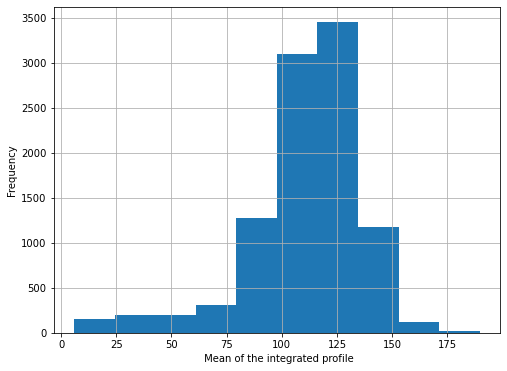

In [72]:
df[" Mean of the integrated profile"].plot.hist(figsize=(8, 6))
plt.xlabel(" Mean of the integrated profile")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

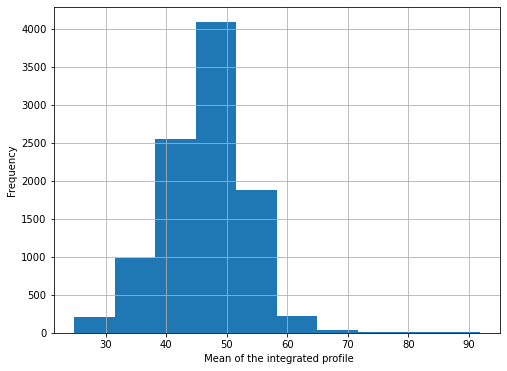

In [73]:
df[" Standard deviation of the integrated profile"].plot.hist(figsize=(8, 6))
plt.xlabel(" Mean of the integrated profile")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

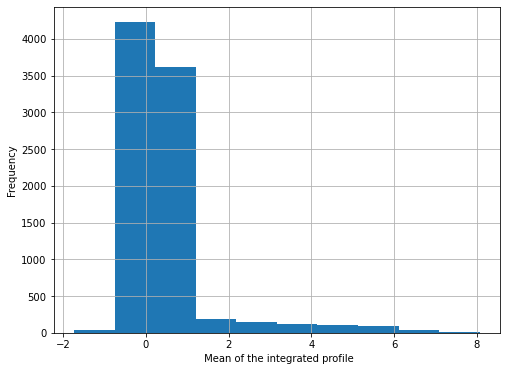

In [74]:
df[" Excess kurtosis of the integrated profile"].plot.hist(figsize=(8, 6))
plt.xlabel(" Mean of the integrated profile")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

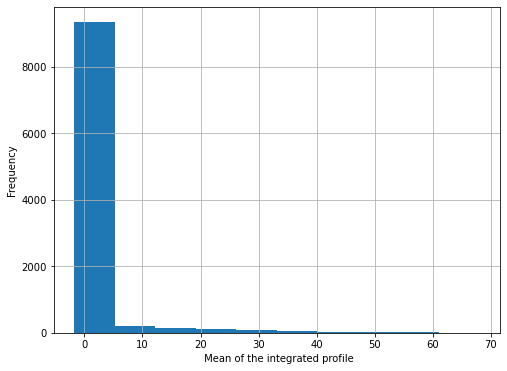

In [75]:
df[" Skewness of the integrated profile"].plot.hist(figsize=(8, 6))
plt.xlabel(" Mean of the integrated profile")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Above you can see the distribution of the first 4 features. None of the features have a normal distribution and this could be a reason to normalize the data.

#### Potential problems and data quality issues are:

(1) Feature names have a space before the first word.  

(2) Missing values in:
- Excess kurtosis of the integrated profile
- Standard deviation of the DM-SNR curve
- Skewness of the DM-SNR curve

(3) Distribution of data for each feature is not Gaussian. This could be a reason to choose normalization over standardization.

#### Solutions:
(1) Fixing feature names should be straightforward in that I just have to strip the space at the start of each column name.

(2) To remove the missing values problem I have a number of options:
- Removal of rows
- Impution:
    - mean
    - median
    - mode
    - KNNImputer 
    - SimpleImputer

For the features a large portion of each is missing so I will use impution with the KNNImputer. I will do this becasue I want to retain the majority of data. I have chosen KNNImputer over the other impution options because it produces more of an accurate estimate of missing values than using a single correlated feature.

(3) Looking into the features I found that the majority do not follow a normal distribution. In the next task I will normalize the data as standardization assumes that the data follows a Gaussian distribution.


### Task 2 - Normalize or standardize your features as necessary. 

#### (1) Fixing feature names:

In [76]:
df.columns = df.columns.str.strip()
column_names = df.columns
print(column_names)

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')


Now feature names have no leading space.

#### (2) Filling in missing values:

KNN Imputer

In [77]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df)
df = pd.DataFrame(imputed_data, columns=df.columns)

In [78]:
df.isna().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

In [79]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,69.210938,36.152380,2.602622,11.032994,11.813545,47.869750,3.902658,15.151920,1.0
1,134.406250,50.156854,0.079866,0.033346,6.665552,32.420758,5.661207,32.734410,0.0
2,115.328125,42.048170,0.173711,0.986480,3.673913,17.791359,6.585335,55.940803,0.0
3,89.671875,37.521059,0.601360,1.764652,2.541806,17.225897,9.405202,103.620491,0.0
4,127.539062,50.289459,-0.084592,-0.333478,103.101171,78.528624,-0.500153,-1.629239,0.0
...,...,...,...,...,...,...,...,...,...
9995,134.140625,50.561493,0.062787,-0.269271,3.739967,20.886901,7.469796,63.328740,0.0
9996,102.359375,43.823106,0.242901,0.102978,3.076087,20.804077,7.502146,59.399329,0.0
9997,101.531250,46.394696,0.236189,0.187752,3.801003,21.835862,7.060130,55.326122,0.0
9998,111.210938,42.033962,0.434656,0.710722,2.175585,16.496727,9.665629,114.822621,0.0


#### (3) Normalize

In [80]:
df_features = df.iloc[:, :-1]
target = df.iloc[:, -1]
df_features

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,69.210938,36.152380,2.602622,11.032994,11.813545,47.869750,3.902658,15.151920
1,134.406250,50.156854,0.079866,0.033346,6.665552,32.420758,5.661207,32.734410
2,115.328125,42.048170,0.173711,0.986480,3.673913,17.791359,6.585335,55.940803
3,89.671875,37.521059,0.601360,1.764652,2.541806,17.225897,9.405202,103.620491
4,127.539062,50.289459,-0.084592,-0.333478,103.101171,78.528624,-0.500153,-1.629239
...,...,...,...,...,...,...,...,...
9995,134.140625,50.561493,0.062787,-0.269271,3.739967,20.886901,7.469796,63.328740
9996,102.359375,43.823106,0.242901,0.102978,3.076087,20.804077,7.502146,59.399329
9997,101.531250,46.394696,0.236189,0.187752,3.801003,21.835862,7.060130,55.326122
9998,111.210938,42.033962,0.434656,0.710722,2.175585,16.496727,9.665629,114.822621


In [81]:
scaler = MinMaxScaler() 
df_features = scaler.fit_transform(df_features) 
df_features = pd.DataFrame(df_features, columns=column_names[:-1])
df_features

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,0.344703,0.169763,0.442582,0.183492,0.054787,0.392162,0.175904,0.014358
1,0.699176,0.378671,0.185356,0.026114,0.030474,0.242567,0.223206,0.029096
2,0.595446,0.257712,0.194925,0.039751,0.016344,0.100908,0.248064,0.048549
3,0.455951,0.190180,0.238529,0.050885,0.010998,0.095432,0.323914,0.088516
4,0.661838,0.380649,0.168587,0.020866,0.485926,0.689038,0.057474,0.000291
...,...,...,...,...,...,...,...,...
9995,0.697732,0.384707,0.183615,0.021785,0.016656,0.130883,0.271854,0.054742
9996,0.524934,0.284189,0.201979,0.027111,0.013521,0.130081,0.272725,0.051448
9997,0.520432,0.322550,0.201295,0.028324,0.016945,0.140071,0.260835,0.048034
9998,0.573061,0.257500,0.221531,0.035806,0.009268,0.088372,0.330919,0.097906


Merge features and target back together:

In [82]:
df = pd.concat([df_features, target], axis=1)
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,0.344703,0.169763,0.442582,0.183492,0.054787,0.392162,0.175904,0.014358,1.0
1,0.699176,0.378671,0.185356,0.026114,0.030474,0.242567,0.223206,0.029096,0.0
2,0.595446,0.257712,0.194925,0.039751,0.016344,0.100908,0.248064,0.048549,0.0
3,0.455951,0.190180,0.238529,0.050885,0.010998,0.095432,0.323914,0.088516,0.0
4,0.661838,0.380649,0.168587,0.020866,0.485926,0.689038,0.057474,0.000291,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.697732,0.384707,0.183615,0.021785,0.016656,0.130883,0.271854,0.054742,0.0
9996,0.524934,0.284189,0.201979,0.027111,0.013521,0.130081,0.272725,0.051448,0.0
9997,0.520432,0.322550,0.201295,0.028324,0.016945,0.140071,0.260835,0.048034,0.0
9998,0.573061,0.257500,0.221531,0.035806,0.009268,0.088372,0.330919,0.097906,0.0


### Task 3 - Decide the evaluation measure best suited.

Accuracy ?
- In order for accuracy to work correctly the target classes must be even in weight.

In [83]:
value_counts = df["target_class"].value_counts()
value_counts

0.0    9081
1.0     919
Name: target_class, dtype: int64

Accuracy is not a suitable evaluation method here because the target column is not balanced. The 0 class heavily outweighs the 1 class.

Hence the heavy class imbalance, I think the evaluation method best suited for this dataset is the F1 score. This is a reliable evalualtion method and blends both precision and recall which can handle the imbalance of my classes.

### Task 4 - Compare a decision tree classifier, a KNN classifier and four SVM classifiers based on the evaluation measure selected in Task 3.

First I am splitting my data into training and test sets. Then using f1 score I will evalute the different classifiers and their parameters.

#### Train-test split:

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, train_size=.75, random_state=5)

#### Decision Tree Classifier

With no parameters:

In [85]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 1.0
Test set F1 score = 0.8319327731092436


Parameters:
- criterion="entropy"
- max_depth=None

In [86]:
dt_clf = DecisionTreeClassifier(criterion="entropy")
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 1.0
Test set F1 score = 0.8486140724946696


Parameters:
- criterion="gini"
- max_depth=None

In [87]:
dt_clf = DecisionTreeClassifier(criterion="gini")
dt_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = dt_clf.predict(X_train)
print("Training set F1 score =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = dt_clf.predict(X_test)
print("Test set F1 score =", f1_score(y_test, y_predicted))

Training set F1 score = 1.0
Test set F1 score = 0.8347457627118644


The Decision Tree Classifier seems to work better so far without any criterion. The f1 score on the test set with criterion are lower than without.

Parameters:
- max depth = n

In [88]:
for n in [2, 3, 4, 5, 6, 7]:

    print("\nMax_depth = ", n)
    dt_clf = DecisionTreeClassifier(max_depth=n) 
    dt_clf.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = dt_clf.predict(X_train)
    print("F1 score on training set prediction =", f1_score(y_train, y_predicted))
        
    # predict on the test dataset 
    y_predicted = dt_clf.predict(X_test)
    print("F1 score on test set prediction =", f1_score(y_test, y_predicted))


Max_depth =  2
F1 score on training set prediction = 0.8723570869224745
F1 score on test set prediction = 0.8749999999999999

Max_depth =  3
F1 score on training set prediction = 0.8783570300157978
F1 score on test set prediction = 0.8798185941043084

Max_depth =  4
F1 score on training set prediction = 0.8943338437978562
F1 score on test set prediction = 0.8830022075055188

Max_depth =  5
F1 score on training set prediction = 0.9071373752877974
F1 score on test set prediction = 0.8785871964679912

Max_depth =  6
F1 score on training set prediction = 0.9154607768469155
F1 score on test set prediction = 0.8854625550660793

Max_depth =  7
F1 score on training set prediction = 0.9316960859554874
F1 score on test set prediction = 0.869757174392936


Here using no criterion and having a max_depth of 4 works very well with a f1 score of 0.88 on the test set prediction.

Parameters:
- criterion="entropy"
- max_depth=n

In [89]:
for n in [2, 3, 4, 5, 6, 7]:

    print("\nMax_depth = ", n)
    dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=n) 
    dt_clf.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = dt_clf.predict(X_train)
    print("F1 score on training set prediction =", f1_score(y_train, y_predicted))
        
    # predict on the test dataset 
    y_predicted = dt_clf.predict(X_test)
    print("F1 score on test set prediction =", f1_score(y_test, y_predicted))


Max_depth =  2
F1 score on training set prediction = 0.8704980842911878
F1 score on test set prediction = 0.8716814159292036

Max_depth =  3
F1 score on training set prediction = 0.8704980842911878
F1 score on test set prediction = 0.8716814159292036

Max_depth =  4
F1 score on training set prediction = 0.8809891808346214
F1 score on test set prediction = 0.8769574944071588

Max_depth =  5
F1 score on training set prediction = 0.8925373134328358
F1 score on test set prediction = 0.8903225806451613

Max_depth =  6
F1 score on training set prediction = 0.9038607115821348
F1 score on test set prediction = 0.888888888888889

Max_depth =  7
F1 score on training set prediction = 0.9125475285171103
F1 score on test set prediction = 0.8796498905908097


Above using the criterion "entropy" and max_depth = 5, works extremely well. It gives the f1 measure of 0.89 on the test set.

Parameters:
- criterion="gini"
- max_depth=n

In [90]:
for n in [2, 3, 4, 5, 6, 7]:

    print("\nMax_depth = ", n)
    dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=n) 
    dt_clf.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = dt_clf.predict(X_train)
    print("F1 score on training set prediction =", f1_score(y_train, y_predicted))
        
    # predict on the test dataset 
    y_predicted = dt_clf.predict(X_test)
    print("F1 score on test set prediction =", f1_score(y_test, y_predicted))


Max_depth =  2
F1 score on training set prediction = 0.8723570869224745
F1 score on test set prediction = 0.8749999999999999

Max_depth =  3
F1 score on training set prediction = 0.8783570300157978
F1 score on test set prediction = 0.8798185941043084

Max_depth =  4
F1 score on training set prediction = 0.8943338437978562
F1 score on test set prediction = 0.8854625550660793

Max_depth =  5
F1 score on training set prediction = 0.908256880733945
F1 score on test set prediction = 0.8761061946902655

Max_depth =  6
F1 score on training set prediction = 0.9154607768469155
F1 score on test set prediction = 0.8854625550660793

Max_depth =  7
F1 score on training set prediction = 0.9316960859554874
F1 score on test set prediction = 0.8716814159292036


With "gini" as criterion and max_depth = 4 works great here as well, with a f1 score of 0.88 on the test set performance.

- In terms of the best possible parameters for the Decision Tree Classifier it is:
    - criterion = "entropy"
    - max_depth = 5

This derives an f1 score of 0.89 on the test set and 0.90 on the training set performace.

#### KNN Classifier:

No parameters:

In [91]:
knn_clf = KNeighborsClassifier() 
knn_clf.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = knn_clf.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = knn_clf.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 0.8847058823529411
F1 score on test set prediction = 0.8716814159292036


Above the KNN Classifier straight away gives a very good f1 measures for the training (0.88) and test (0.87) set performance without any parameters.

With parameters:
- n_neighbours = n

In [92]:
for n in [2, 3, 4, 5, 7, 9]:

    print('\nn_neighbors = ', n)
    knn_clf = KNeighborsClassifier(n_neighbors=n) 
    knn_clf.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = knn_clf.predict(X_train)
    print("F1 score on training set prediction =", f1_score(y_train, y_predicted))
        
    # predict on the test dataset 
    y_predicted = knn_clf.predict(X_test)
    print("F1 score on test set prediction =", f1_score(y_test, y_predicted))


n_neighbors =  2


F1 score on training set prediction = 0.8977272727272727
F1 score on test set prediction = 0.8669724770642202

n_neighbors =  3
F1 score on training set prediction = 0.9028749028749029
F1 score on test set prediction = 0.887912087912088

n_neighbors =  4
F1 score on training set prediction = 0.885140562248996
F1 score on test set prediction = 0.870748299319728

n_neighbors =  5
F1 score on training set prediction = 0.8847058823529411
F1 score on test set prediction = 0.8716814159292036

n_neighbors =  7
F1 score on training set prediction = 0.8854003139717426
F1 score on test set prediction = 0.8769574944071588

n_neighbors =  9
F1 score on training set prediction = 0.8822134387351779
F1 score on test set prediction = 0.8789237668161436


When KNN Classifier has the parameter: n_neighbours = 3, the f1 score is the best being 0.88 on the test set.

- The best possible parameter for KNN is 
    - therefore n_neighbours = 3 

This hones the training set score of 0.90 and the test set score of 0.88

#### SVM Classifier:

Fitting SVC with a **linear kernel** on the traning data and checking the accuracy on the testing data

In [93]:
svc = SVC(kernel="linear")
svc.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = svc.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = svc.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 0.8441879637262985
F1 score on test set prediction = 0.8669724770642202


Above are the linear f1 scores. At first glance they don't seem as high as KNN and Decision Tree Classifiers.

Fitting SVC with a **poly kernel** on the training data and checking the accuracy on the testing data

In [94]:
svc = SVC(kernel="poly")
svc.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = svc.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = svc.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 0.8750994431185364
F1 score on test set prediction = 0.8808988764044944


The f1 score with poly is a lot better than linear.

In [95]:
for n in [2, 3, 4, 5, 7, 8]:

    print('\ndegree =', n)
    svc = SVC(kernel="poly", degree=n) 
    svc.fit(X_train, y_train)

    # predict on the training dataset 
    y_predicted = svc.predict(X_train)
    print("F1 score on training set prediction =", f1_score(y_train, y_predicted))
        
    # predict on the test dataset 
    y_predicted = svc.predict(X_test)
    print("F1 score on test set prediction =", f1_score(y_test, y_predicted))


degree = 2
F1 score on training set prediction = 0.8715083798882682
F1 score on test set prediction = 0.8823529411764706

degree = 3
F1 score on training set prediction = 0.8750994431185364
F1 score on test set prediction = 0.8808988764044944

degree = 4
F1 score on training set prediction = 0.8779714738510301
F1 score on test set prediction = 0.8783783783783784

degree = 5
F1 score on training set prediction = 0.8816521048451151
F1 score on test set prediction = 0.8758465011286681

degree = 7
F1 score on training set prediction = 0.8961141950832673
F1 score on test set prediction = 0.8783783783783784

degree = 8
F1 score on training set prediction = 0.9015873015873017
F1 score on test set prediction = 0.8738738738738738


With degree = 2, poly has a even higher test set score of 0.88 

Fitting SVC with a **rbf kernel** on the traning data and checking the accuracy on the testing data

In [96]:
svc = SVC(kernel="rbf")
svc.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = svc.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = svc.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 0.862681744749596
F1 score on test set prediction = 0.867579908675799


With rbf the f1 scores are less than poly but still good.

Fitting SVC with a **sigmoid kernel** on the traning data and checking the accuracy on the testing data

In [97]:
svc = SVC(kernel="sigmoid")
svc.fit(X_train, y_train)

# predict on the training dataset 
y_predicted = svc.predict(X_train)
print("F1 score on training set prediction =", f1_score(y_train, y_predicted))

# predict on the test dataset 
y_predicted = svc.predict(X_test)
print("F1 score on test set prediction =", f1_score(y_test, y_predicted))

F1 score on training set prediction = 0.46376811594202905
F1 score on test set prediction = 0.4817204301075269


Sigmoid kernel is definitely the worst SVM classifier and classifier in general. It does not score over 0.5 on the f1 measure for either test set.

#### Winner classifier/parameter setting:

- Decision Tree Classifier with criterion = "entropy" and max_depth = 5. 

This gave the f1 scores of 0.89 on the test set and the training set, deeming it to be th best classifier out of the group.

#### Why I got those comparison results:

...

#### Performance of “linear”, “rbf” and “sigmoid” kernels:
Regarding the performance of these SVM Classifiers, linear and rbf were very similar. They scored around 0.86 for the test set prediction which is good. Sigmoid however was very bad, it did not score over 0.5 on either of the sets which I was very surprised about.

### Task 5 - Identify the three most discriminative features and the three least discriminative features

Using Mutual Information

In [98]:
i_scores = mutual_info_classif(X_train, y_train)

# put the i_scores in a dataframe and sort
features_info_gain = pd.DataFrame(i_scores, index = X_train.columns, columns =["Info Gain"])
features_info_gain.sort_values(by=["Info Gain"], ascending=False, inplace=True)
features_info_gain

,Info Gain
Excess kurtosis of the integrated profile,0.224495
Skewness of the integrated profile,0.194276
Mean of the integrated profile,0.190489
Standard deviation of the DM-SNR curve,0.116333
Skewness of the DM-SNR curve,0.114346
Mean of the DM-SNR curve,0.111694
Excess kurtosis of the DM-SNR curve,0.108087
Standard deviation of the integrated profile,0.085484


In [99]:
# Generate top 3 and bottom 3 dataframes 
top3_features_train = X_train[features_info_gain.index[:3]]
top3_features_test = X_test[features_info_gain.index[:3]]

top3_features_train.head()

,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the integrated profile
5474,0.189464,0.030599,0.606151
9663,0.219981,0.018960,0.573486
8489,0.246308,0.041342,0.502804
3294,0.187824,0.022302,0.620848
2297,0.186800,0.021372,0.621527


The top 3 most discriminative features are "Excess kurtosis of the integrated profile", "Skewness of the integrated profile", "Mean of the integrated profile".

In [100]:
bottom3_features_train = X_train[features_info_gain.index[-3:]]
bottom3_features_test = X_test[features_info_gain.index[-3:]]

bottom3_features_train.head()

,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Standard deviation of the integrated profile
5474,0.055904,0.166030,0.386058
9663,0.793655,0.041588,0.482743
8489,0.011096,0.332521,0.285370
3294,0.011424,0.287846,0.383732
2297,0.004668,0.437820,0.403636


The least discriminative features are "Mean of the DM-SNR curve", "Excess kurtosis of the DM-SNR curve", "Standard deviation of the integrated profile".

##### Running the SVM classifiers with the four kernels on the top three and the bottom three features. How do the results compare? 

In [101]:
svc = SVC(kernel="linear")

svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("F1 score of the model trained on the top 3 features: ", f1_score(y_test, y_predicted))

svc.fit(bottom3_features_train, y_train)
y_predicted = svc.predict(bottom3_features_test)
print("F1 score of the model trained on the bottom 3 features: ", f1_score(y_test, y_predicted))

F1 score of the model trained on the top 3 features:  0.8277511961722488
F1 score of the model trained on the bottom 3 features:  0.689295039164491


For linear the f1 score is good for the top 3 features (0.82) and not great for the bottom 3 (0.68)

In [102]:
svc = SVC(kernel="poly")

svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("F1 score of the model trained on the top 3 features: ", f1_score(y_test, y_predicted))

svc.fit(bottom3_features_train, y_train)
y_predicted = svc.predict(bottom3_features_test)
print("F1 score of the model trained on the bottom 3 features: ", f1_score(y_test, y_predicted))

F1 score of the model trained on the top 3 features:  0.8752834467120181
F1 score of the model trained on the bottom 3 features:  0.619718309859155


For poly the top 3 features work very well in prediction and better than linear kernel. However it predicts worse than linear for the bottom 3 features. 

In [103]:
svc = SVC(kernel="rbf")

svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("F1 score of the model trained on the top 3 features: ", f1_score(y_test, y_predicted))

svc.fit(bottom3_features_train, y_train)
y_predicted = svc.predict(bottom3_features_test)
print("F1 score of the model trained on the bottom 3 features: ", f1_score(y_test, y_predicted))

F1 score of the model trained on the top 3 features:  0.8571428571428571
F1 score of the model trained on the bottom 3 features:  0.7083333333333334


With rbf the model predicts well, just under the f1 score of poly and has the highest score for the bottom 3 features so far.

In [104]:
svc = SVC(kernel="sigmoid")

svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("F1 score of the model trained on the top 3 features: ", f1_score(y_test, y_predicted))

svc.fit(bottom3_features_train, y_train)
y_predicted = svc.predict(bottom3_features_test)
print("F1 score of the model trained on the bottom 3 features: ", f1_score(y_test, y_predicted))

F1 score of the model trained on the top 3 features:  0.705607476635514
F1 score of the model trained on the bottom 3 features:  0.1936842105263158


For sigmoid the f1 score for the top 3 features is the worst with 0.70 and also has the worst score for the bottom 3 features with 0.19

##### Results:

- The poly kernel is still the best closely followed by rbf, then linear. Sigmoid once again is the worst.

- In terms of overall result it can be seen how the top 3 features are the most discriminative. The f1 scores are still very strong for most kernels and only drop a small bit compared to the previous f1 measures. For the bottom 3 features the model finds it harder to classify because of their unimportance and thus the f1 measures are lower than usual.

### Task 6 - Identify the most discriminating features to predict the binary outcome of the dataset using one wrapper feature selection technique. 

- Wrapper feature selection technique: **SequentialFeatureSelector** from sklearn
- Finding the top 3 most discrimintive features

Decision Tree Classifier:

In [105]:
dt_clf = DecisionTreeClassifier()

sfs = SequentialFeatureSelector(dt_clf, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features (for task 7)
dt6_top3_features_train = X_train[selected_feature_names]
dt6_top3_features_test = X_test[selected_feature_names]

dt6_top3_features_train.head()


,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
5474,0.189464,0.345921,0.011098
9663,0.219981,0.815732,0.001216
8489,0.246308,0.108349,0.090043
3294,0.187824,0.122817,0.058434
2297,0.186800,0.073959,0.164852


Above are the most discriminative features according to the Decision Tree.

KNN Classifier:

In [106]:
knn_clf = KNeighborsClassifier() 

sfs = SequentialFeatureSelector(knn_clf, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features
knn6_top3_features_train = X_train[selected_feature_names]
knn6_top3_features_test = X_test[selected_feature_names]

knn6_top3_features_train.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile
5474,0.606151,0.386058,0.189464
9663,0.573486,0.482743,0.219981
8489,0.502804,0.285370,0.246308
3294,0.620848,0.383732,0.187824
2297,0.621527,0.403636,0.186800


For KNN, the common features with the Decision Tree is "Standard deviation of the integrated profile" and "Excess kurtosis of the integrated profile".

**SVM**

Linear Kernel: 

In [107]:
svc = SVC(kernel="linear")

sfs = SequentialFeatureSelector(svc, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features
linear6_top3_features_train = X_train[selected_feature_names]
linear6_top3_features_test = X_test[selected_feature_names]

linear6_top3_features_train.head()

,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve,Skewness of the DM-SNR curve
5474,0.189464,0.345921,0.011098
9663,0.219981,0.815732,0.001216
8489,0.246308,0.108349,0.090043
3294,0.187824,0.122817,0.058434
2297,0.186800,0.073959,0.164852


For SVM with the "linear" kernel, the only common feature with Decision Tree and KNN is "Excess kurtosis of the integrated profile".

Poly Kernel (takes a while to run): 

In [ ]:
svc = SVC(kernel="poly")

sfs = SequentialFeatureSelector(svc, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features
poly6_top3_features_train = X_train[selected_feature_names]
poly6_top3_features_test = X_test[selected_feature_names]

poly6_top3_features_train.head()

RBF Kernel:

In [108]:
svc = SVC(kernel="rbf")

sfs = SequentialFeatureSelector(svc, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features
rbf6_top3_features_train = X_train[selected_feature_names]
rbf6_top3_features_test = X_test[selected_feature_names]

rbf6_top3_features_train.head()

,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Standard deviation of the DM-SNR curve
5474,0.386058,0.189464,0.345921
9663,0.482743,0.219981,0.815732
8489,0.285370,0.246308,0.108349
3294,0.383732,0.187824,0.122817
2297,0.403636,0.186800,0.073959


With the "rbf" kernel, "Standard deviation of the integrated profile" and "Excess kurtosis of the integrated profile" both appear for the third time. "Standard deviation of the DM-SNR curve" appears for the second time.

Sigmoid Kernel:


In [109]:
svc = SVC(kernel="sigmoid")

sfs = SequentialFeatureSelector(svc, n_features_to_select=3, scoring="f1")
# Fit the SequentialFeatureSelector to the training data
sfs = sfs.fit(X_train, y_train)

selected_feature_indices = sfs.get_support()
selected_feature_names = X_train.columns[selected_feature_indices]

# training and test set based off the selected features
sigmoid6_top3_features_train = X_train[selected_feature_names]
sigmoid6_top3_features_test = X_test[selected_feature_names]

sigmoid6_top3_features_train.head()

,Skewness of the integrated profile,Mean of the DM-SNR curve,Excess kurtosis of the DM-SNR curve
5474,0.030599,0.055904,0.166030
9663,0.018960,0.793655,0.041588
8489,0.041342,0.011096,0.332521
3294,0.022302,0.011424,0.287846
2297,0.021372,0.004668,0.437820


Finally for the "sigmoid" kernel, it does not have any common features.

Result:
- The features that appear most frequently and are deemed the most discriminative are:

    - "Standard deviation of the integrated profile"
    - "Excess kurtosis of the integrated profile"
    - "Standard deviation of the DM-SNR curve"

- In comparison with the results found in Task 5 the outcomes are quite similar. "Standard deviation of the integrated profile" and "Excess kurtosis of the integrated profile" are the top 2 most discriminative features in Task 5 and Task 6. This shows that these two features are definitely the most important in classifying as both methods give similar results.

- The third most discriminate result is different for Task 5 and 6. "Standard deviation of the DM-SNR curve" comes fourth in Task 5 in order of discrimination. This just means that the other features aren't as clear cut stand out features like the top two.

### Task 7 - Compare the performance of different classifiers using the different feature subsets found in Tasks 5 and 6 and compare it to the results on the original dataset that you reported in Task 4.

Decision Tree Classifier:

In [115]:
dt_clf = DecisionTreeClassifier()

# task 4 original dataset
dt_clf.fit(X_train, y_train)
y_predicted = dt_clf.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
dt_clf.fit(top3_features_train, y_train)
y_predicted = dt_clf.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
dt_clf.fit(dt6_top3_features_train, y_train)
y_predicted = dt_clf.predict(dt6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.828752642706131
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.8117154811715481
Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector = 0.8297872340425533


For the Decision Tree Classifier, the model works well similar for all the subets of data. All averaging an f1 score of 0.82 

KNN Classifier:

In [116]:
knn_clf = KNeighborsClassifier()

# task 4 original dataset
knn_clf.fit(X_train, y_train)
y_predicted = knn_clf.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
knn_clf.fit(top3_features_train, y_train)
y_predicted = knn_clf.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
knn_clf.fit(knn6_top3_features_train, y_train)
y_predicted = knn_clf.predict(knn6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.8716814159292036
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.8780487804878049
Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector = 0.8766519823788547


For the KNN model, all subsets also work very similar with an f1 score of 0.87. This is a very good score.

SVM

Linear kernel:

In [114]:
svc = SVC(kernel="linear")

# task 4 original dataset
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
svc.fit(linear6_top3_features_train, y_train)
y_predicted = svc.predict(linear6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.8669724770642202
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.8277511961722488
Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector = 0.8551724137931034


For the linear kernel of SVM, the f1 scores are more varied. The original dataset scored the best followed by the SequentialFeatureSelector. All measures are above 0.82 which is still very good.

Poly kernel:

In [119]:
svc = SVC(kernel="poly")

# task 4 original dataset
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
svc.fit(poly6_top3_features_train, y_train)
y_predicted = svc.predict(poly6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.8808988764044944
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.8752834467120181


NameError: name 'poly6_top3_features_train' is not defined

Rbf kernel:

In [117]:
svc = SVC(kernel="rbf")

# task 4 original dataset
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
svc.fit(rbf6_top3_features_train, y_train)
y_predicted = svc.predict(rbf6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.867579908675799
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.8571428571428571
Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector = 0.8662131519274375


For the rbf kernel, the f1 measure for all subsets is very similar, all scores being around 0.86. There is not much difference between them.

Sigmoid kernel:

In [118]:
svc = SVC(kernel="sigmoid")

# task 4 original dataset
svc.fit(X_train, y_train)
y_predicted = svc.predict(X_test)
print("Task 4: the F1 score of the model trained on original training set =", f1_score(y_test, y_predicted))


# task 5 feature subset using info gain
svc.fit(top3_features_train, y_train)
y_predicted = svc.predict(top3_features_test)
print("Task 5: the F1 score of the model trained on the top 3 features using info gain =", f1_score(y_test, y_predicted))

# task 6 feature subset using SequentialFeatureSelector
svc.fit(sigmoid6_top3_features_train, y_train)
y_predicted = svc.predict(sigmoid6_top3_features_test)
print("Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector =", f1_score(y_test, y_predicted))

Task 4: the F1 score of the model trained on original training set = 0.4817204301075269
Task 5: the F1 score of the model trained on the top 3 features using info gain = 0.705607476635514
Task 6: the F1 score of the model trained on the top 3 features using SequentialFeatureSelector = 0.5351473922902494


Finally for the sigmoid kernel, the original and SequentialFeatureSelector subset do very bad here. The info gain subset however does surprisingly well with a score of 0.70.

Result:

- With feature selection, the results for most classifiers either stayed the same of dropped of very slightly. This conveys to me how influential the discriminative features are.

- The only classifier that was different was the sigmoid kernel which improved greatly with the information gain feature selection. It improved by 0.2 from the original dataset.

- Overall I'm surprised at the result. The subsets still allow the classifiers to work very well and are almost all on par with the original training set.